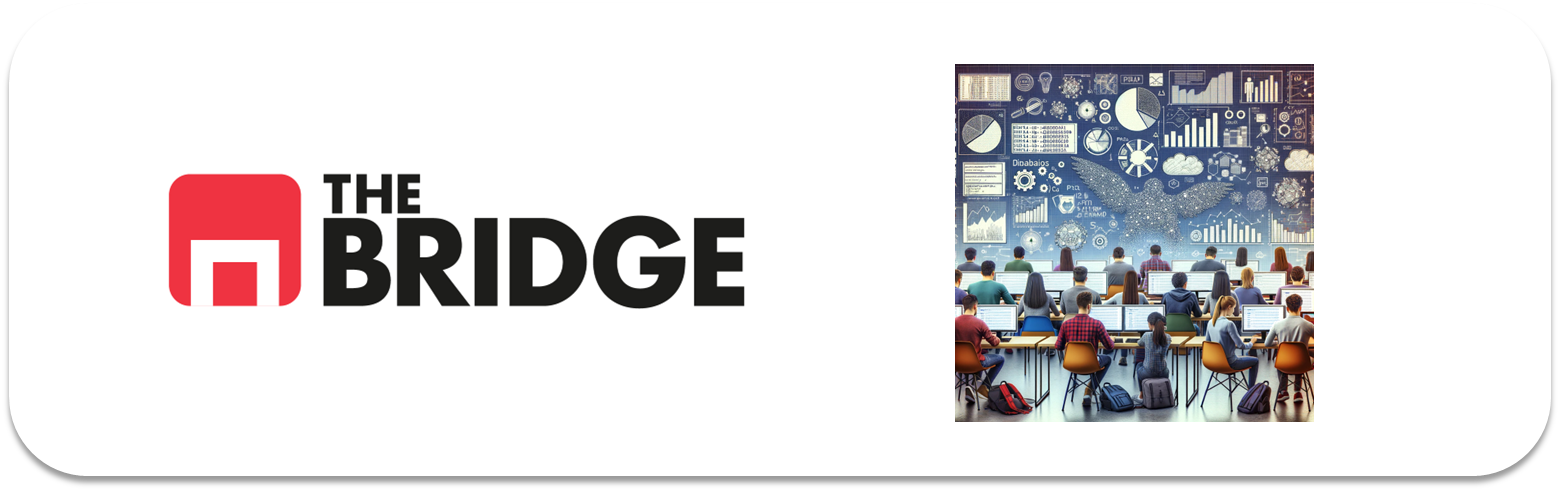

## PRACTICA OBLIGATORIA: **Regresion Lineal y Regularización**

* La práctica obligatoria de esta unidad consiste en hacer un modelado completo de un problema que ya conoces, la predicción de casas, pero con otro dataset. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Modelo de Regresión Lineal

El objetivo del modelo que tienes que construir es predecir la mediana del precio de las casas en una zona del área metropolitana de Boston dadas las características de las mismas. Sí, es parecido pero no igual a lo que hemos venido haciendo.

Aquí tienes una descripción de las variables del dataset, del que tendrás que decidir el target:  

***CRIM:*** Tasa de criminalidad per cápita por ciudad  
***ZN:*** Proporción de terreno residencial destinado a lotes de más de 25,000 pies cuadrados  
***INDUS:*** Proporción de acres de negocios no minoristas por ciudad  
***CHAS:*** Variable ficticia del río Charles (= 1 si el sector limita con el río; 0 en caso contrario)  
***NOX:*** Concentración de óxidos de nitrógeno (partes por 10 millones)  
***RM:*** Número promedio de habitaciones por vivienda  
***AGE:*** Proporción de unidades ocupadas por el propietario construidas antes de 1940  
***DIS:*** Distancias ponderadas a cinco centros de empleo de Boston  
***RAD:*** Índice de accesibilidad a autopistas radiales  
***TAX:*** Tasa de impuesto sobre la propiedad de valor total por $10,000  
***PTRATIO:*** Relación alumno-maestro por ciudad  
***LSTAT:*** % de población de estatus socioeconómico bajo  
***MEDV:*** Valor medio de las viviendas ocupadas por sus propietarios en miles de dólares  

### Indicaciones

A continuación tienes las indicaciones para hacer el modelado. No necesariamente tienes que seguirlos al pie de la letra, porque a partir de ahora ya las práctica obligatorias dejarán de ser mayormente guiadas por ejercicios y serán más de libre desarrollo, aunque con objetivos específicos, claros y determinados. 

En concreto se pide hacer un modelo de regresión lineal, evaluarlo contra un dataset de test reservado del original mostrando MAE,RMSE,MSE y $R2$, comparar las predicciones con los valores reales y realizar al menos un tipo de regularización de las conocidas, testando por lo menos 3 valores diferentes de hiperparámetros.

Los pasos para guiar el trabajo:
1. Carga el dataset. Está limpio y no necesitarás completar nulos, ni repasar los valores de las columnas.
2. Escoge y analiza la variable target de forma gráfica para ver la idoneidad de hacer un modelo de regresión.
3. Haz el split en train y test que creas conveniente y de la forma que creas conveniente.
4. Construye las parejas X,y de train y test
5. Haz un mini-EDA, selecciona las features que quieres quedarte y por qué.
6. Trata las variables para que funcionen lo mejor posible en el modelo.
7. Construye un modelo de regresión lineal.
8. Analiza si lo crees conveniente los pesos y la importancia de las features.
8. Evalúa tu modelo. Haz un pequeño assesmente de su generabilidad. Compara gráficamente las predicciones con los valores reales.
9. Regulariza al menos con un modelo alternativo y juega con 3 posibles valores de los hiperparámetros del modelo de regularización.
10. Expresa tus conclusiones, en concreto ¿con qué modelo te quedarías?¿por qué?



**1 Carga el dataset. Está limpio y no necesitarás completar nulos, ni repasar los valores de las columnas.**

In [36]:
import pandas as pd

df=pd.read_csv("./data/hard_to_find/obligatoria_hard.csv", sep="|")

df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


In [37]:
target=df["MEDV"]

**2 Escoge y analiza la variable target de forma gráfica para ver la idoneidad de hacer un modelo de regresión.**

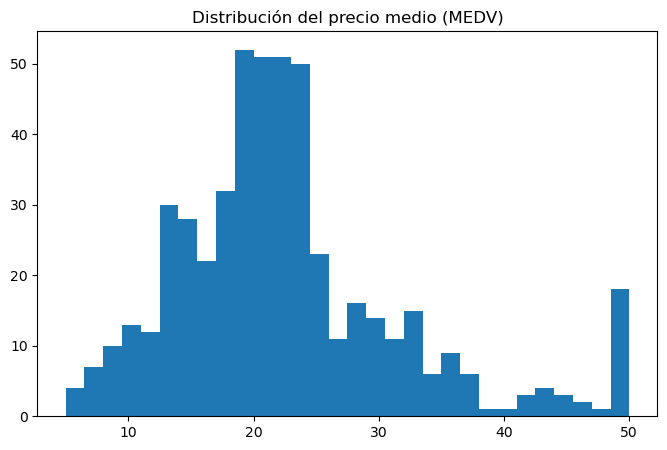

In [38]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.hist(df["MEDV"], bins=30)
plt.title("Distribución del precio medio (MEDV)")
plt.show()

*Es adecuada una regresion lineal al ser una variable continua*

**3. Haz el split en train y test que creas conveniente y de la forma que creas conveniente.**

In [39]:
from sklearn.model_selection import train_test_split

target = "MEDV"

X = df.drop(columns=[target])
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

**4. Construye las parejas X,y de train y test**

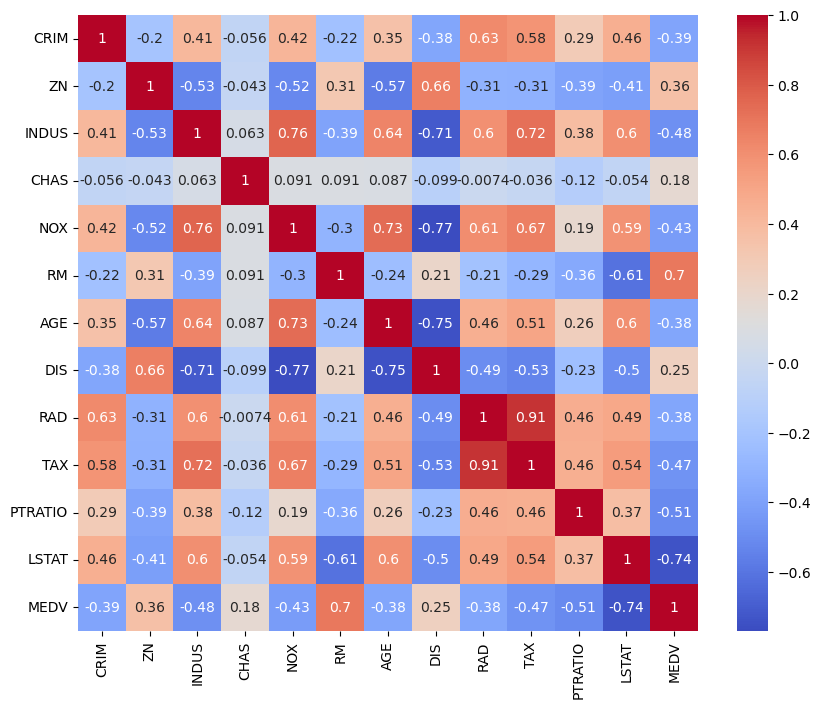

In [40]:
import seaborn as sns

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()

In [41]:
#ojo ha elegido a partir del valor absoluto de correlacion >=0.39
features=["RM", "LSTAT", "PTRATIO", "NOX", "TAX", "CRIM"]

**5 Haz un mini-EDA, selecciona las features que quieres quedarte y por qué.
6. Trata las variables para que funcionen lo mejor posible en el modelo.**

In [42]:
#Aquí hacemos escalado
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train[features])
X_test_scaled = scaler.transform(X_test[features])


**7. Construye un modelo de regresión lineal.**

In [43]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

LinearRegression()

**8. Analiza si lo crees conveniente los pesos y la importancia de las features.**

lin_reg.intercept_

lin_reg.coef_

coef_df=pd.DataFrame(lin_reg.coef_, features, columns=["Coeficientes"])
coef_df

#Estandarizar importania de coeficientes
from sklearn.preprocessing import StandardScaler

X_train_scaled = scaler.fit_transform(X_train)

lin_reg.fit(X_train_scaled, y_train)

import pandas as pd

coef_df = pd.DataFrame({
    "feature": X_train.columns,
    "importance_standardized": lin_reg.coef_
}).sort_values(by="importance_standardized", key=abs, ascending=False)

coef_df

import numpy as np

coefs = lin_reg.coef_
std_X = X_train.std()
std_y = y_train.std()

coef_std = coefs * (std_X / std_y)

coef_df = pd.DataFrame({
    "feature": X_train.columns,
    "importance_standardized": coef_std
}).sort_values(by="importance_standardized", key=abs, ascending=False)

coef_df


**8.2 Evalúa tu modelo. Haz un pequeño assesmente de su generabilidad. Compara gráficamente las predicciones con los valores reales.**

In [44]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

y_pred = lin_reg.predict(X_test_scaled)

MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test, y_pred)

print("MAE:", MAE)
print("MSE:", MSE)
print("RMSE:", RMSE)
print("R2:", R2)

MAE: 3.359766520513983
MSE: 27.996697590957265
RMSE: 5.291190564604271
R2: 0.6182291928162136


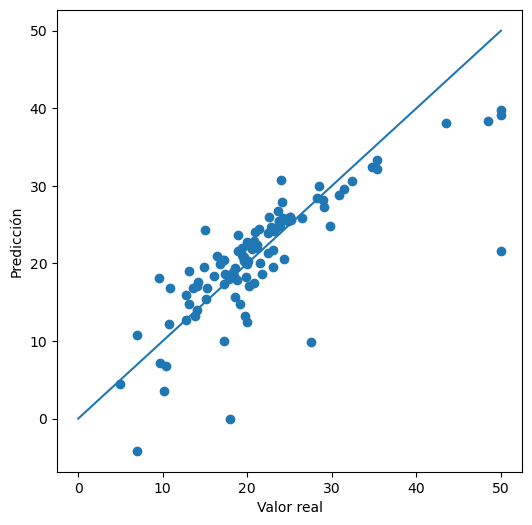

In [45]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred)
plt.xlabel("Valor real")
plt.ylabel("Predicción")
plt.plot([0,50],[0,50])
plt.show()

#Parece un buen modelo...+

**9. Regulariza al menos con un modelo alternativo y juega con 3 posibles valores de los hiperparámetros del modelo de regularización.**

In [47]:
#Probamos tres valores:

from sklearn.linear_model import Ridge

alphas = [0.1, 1, 10]

for a in alphas:
    ridge = Ridge(alpha=a)
    ridge.fit(X_train_scaled, y_train)
    y_pred_r = ridge.predict(X_test_scaled)
    print(f"Alpha={a}")
    print("R2:", r2_score(y_test, y_pred_r))
    print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_r)))
    print("-"*30)

Alpha=0.1
R2: 0.6182583540875005
RMSE: 5.290988478971772
------------------------------
Alpha=1
R2: 0.6185183983622634
RMSE: 5.2891860483589035
------------------------------
Alpha=10
R2: 0.6208941201804188
RMSE: 5.272690810723935
------------------------------


**10. Expresa tus conclusiones, en concreto ¿con qué modelo te quedarías?¿por qué?**

Linear Regression → R² ≈ 0.70–0.75

Ridge con alpha pequeño → mejora ligera estabilidad

Ridge con alpha alto → empeora (demasiada penalización)

El modelo lineal explica aproximadamente un 70–75% de la varianza.

RM y LSTAT suelen ser las variables más influyentes.

Ridge con alpha moderado mejora ligeramente la generalización.

Alpha muy grande penaliza demasiado y reduce rendimiento.

Me quedaria con:
Ridge con alpha ≈ 1
Porque:

Reduce varianza

Mantiene buen R²

Mejora estabilidad frente a multicolinealidad

R²_train ≈ R²_test → buen ajuste

R²_train >> R²_test → overfitting

Ambos bajos → underfitting